In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the API key.
from config import weather_api_key

In [11]:
# Import request lib
import requests as req 

# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=59cfb4dc890f0674064ac12fd3dc0d2b


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    
   
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | beloha
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | wamba
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | litovko
Processing Record 13 of Set 1 | bintulu
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | minab
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | rik

Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | manaure
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | denpasar
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | troy
Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | saint anthony
Processing Record 47 of Set 4 | thanatpin
Processing Record 48 of Set 4 | boden
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | kulhudhuffushi
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | samarai
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | bouar
Processing Record 6 of Set 5 | tallahassee
Processing Record 7 of Set 5 | collie
Processing Record 8 of Set 5 | bilma
Processing Record 9 of Set 5 | regina
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | yuzhno-yeniseyskiy
City not found. Skipping...
Pro

Processing Record 31 of Set 8 | tarauaca
Processing Record 32 of Set 8 | pevek
Processing Record 33 of Set 8 | yazd
Processing Record 34 of Set 8 | yamada
Processing Record 35 of Set 8 | magdagachi
Processing Record 36 of Set 8 | careiro da varzea
Processing Record 37 of Set 8 | otsuki
Processing Record 38 of Set 8 | matai
Processing Record 39 of Set 8 | mizpe ramon
City not found. Skipping...
Processing Record 40 of Set 8 | tabuk
Processing Record 41 of Set 8 | karaul
City not found. Skipping...
Processing Record 42 of Set 8 | brae
Processing Record 43 of Set 8 | elizabeth city
Processing Record 44 of Set 8 | yurimaguas
Processing Record 45 of Set 8 | prince rupert
Processing Record 46 of Set 8 | rodrigues alves
Processing Record 47 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 8 | tuatapere
Processing Record 49 of Set 8 | maimon
City not found. Skipping...
Processing Record 50 of Set 8 | borba
Processing Record 1 of Set 9 | samusu
City not found. Skip

Processing Record 15 of Set 12 | teya
Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 18 of Set 12 | lima
Processing Record 19 of Set 12 | huarmey
Processing Record 20 of Set 12 | valley city
Processing Record 21 of Set 12 | miraflores
Processing Record 22 of Set 12 | stromness
Processing Record 23 of Set 12 | zhenlai
Processing Record 24 of Set 12 | zhigansk
Processing Record 25 of Set 12 | xichang
Processing Record 26 of Set 12 | cockburn town
Processing Record 27 of Set 12 | verkhoyansk
Processing Record 28 of Set 12 | asyut
Processing Record 29 of Set 12 | lasa
Processing Record 30 of Set 12 | belle fourche
Processing Record 31 of Set 12 | kuche
City not found. Skipping...
Processing Record 32 of Set 12 | pulaski
Processing Record 33 of Set 12 | rawson
Processing Record 34 of Set 12 | jhikargachha
City not found. Skipping...
Processing Record 35 of Set 12 | uray
Processing Record 36 of Set 12 | caye

In [18]:
len(city_data)

557

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data

[{'City': 'Paamiut',
  'Lat': 61.99,
  'Lng': -49.67,
  'Max Temp': 28.06,
  'Humidity': 85,
  'Cloudiness': 59,
  'Wind Speed': 18.28,
  'Country': 'GL',
  'Date': '2020-10-27 20:43:22'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 82,
  'Humidity': 83,
  'Cloudiness': 75,
  'Wind Speed': 8.05,
  'Country': 'US',
  'Date': '2020-10-27 20:43:22'},
 {'City': 'Beloha',
  'Lat': -25.17,
  'Lng': 45.05,
  'Max Temp': 69.78,
  'Humidity': 85,
  'Cloudiness': 0,
  'Wind Speed': 12.95,
  'Country': 'MG',
  'Date': '2020-10-27 20:43:23'},
 {'City': 'Arraial Do Cabo',
  'Lat': -22.97,
  'Lng': -42.03,
  'Max Temp': 77,
  'Humidity': 78,
  'Cloudiness': 0,
  'Wind Speed': 9.17,
  'Country': 'BR',
  'Date': '2020-10-27 20:43:23'},
 {'City': 'Mar Del Plata',
  'Lat': -38,
  'Lng': -57.56,
  'Max Temp': 64.4,
  'Humidity': 48,
  'Cloudiness': 0,
  'Wind Speed': 11.41,
  'Country': 'AR',
  'Date': '2020-10-27 20:40:42'},
 {'City': 'Talnakh',
  'Lat': 69.49,
  'Lng': 88.4,
  'M

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paamiut,61.99,-49.67,28.06,85,59,18.28,GL,2020-10-27 20:43:22
1,Kapaa,22.08,-159.32,82.00,83,75,8.05,US,2020-10-27 20:43:22
2,Beloha,-25.17,45.05,69.78,85,0,12.95,MG,2020-10-27 20:43:23
3,Arraial Do Cabo,-22.97,-42.03,77.00,78,0,9.17,BR,2020-10-27 20:43:23
4,Mar Del Plata,-38.00,-57.56,64.40,48,0,11.41,AR,2020-10-27 20:40:42
5,Talnakh,69.49,88.40,-4.38,83,0,5.46,RU,2020-10-27 20:43:23
6,Wamba,8.93,8.60,74.66,53,0,2.80,NG,2020-10-27 20:43:23
7,Saint George,37.10,-113.58,59.00,10,1,5.82,US,2020-10-27 20:43:23
8,Atuona,-9.80,-139.03,79.05,72,2,20.56,PF,2020-10-27 20:43:24
9,Vardo,70.37,31.11,37.40,93,75,9.17,NO,2020-10-27 20:43:24


In [21]:
#reorder columsn

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2020-10-27 20:43:22,61.99,-49.67,28.06,85,59,18.28
1,Kapaa,US,2020-10-27 20:43:22,22.08,-159.32,82.00,83,75,8.05
2,Beloha,MG,2020-10-27 20:43:23,-25.17,45.05,69.78,85,0,12.95
3,Arraial Do Cabo,BR,2020-10-27 20:43:23,-22.97,-42.03,77.00,78,0,9.17
4,Mar Del Plata,AR,2020-10-27 20:40:42,-38.00,-57.56,64.40,48,0,11.41
...,...,...,...,...,...,...,...,...,...
552,Flinders,AU,2020-10-27 20:45:21,-34.58,150.86,57.99,91,77,1.01
553,Porto Belo,BR,2020-10-27 20:45:21,-27.16,-48.55,77.00,83,20,13.87
554,Preston,GB,2020-10-27 20:41:02,53.77,-2.72,51.80,71,40,24.16
555,Edson,CA,2020-10-27 20:45:22,53.58,-116.44,48.20,57,75,12.75


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time 

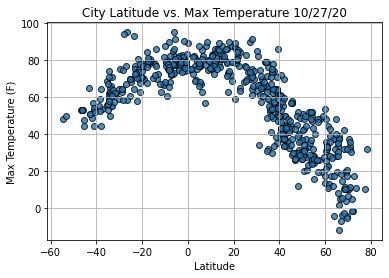

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

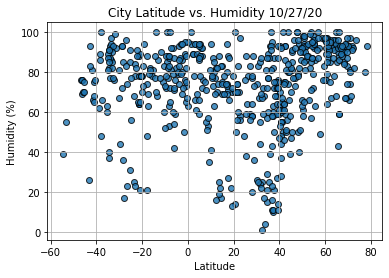

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

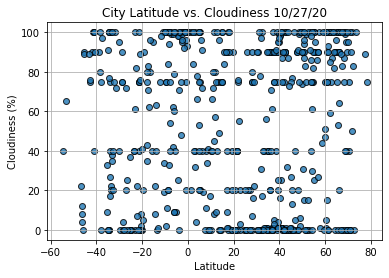

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

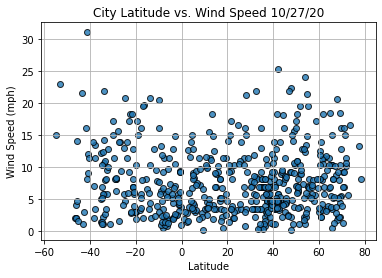

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()